# Receiver

In [1]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from calculation import *
from encrypt import *

# key values
x= 0.8904228400233463
y= 0.8083231526649529
u= 3.57

In [2]:
# read an image file
img = cv.imread('cipherImage.tiff', cv.IMREAD_GRAYSCALE)
print(img.dtype)

uint8


Text(0.5, 1.0, 'received image')

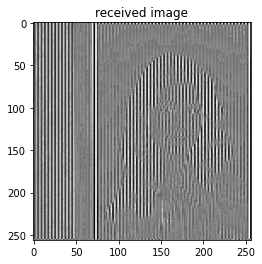

In [3]:
# showing image using matplotlib
plt.imshow(img, cmap='gray')
plt.title('received image')

In [4]:
# getting image height and width
height = img.shape[0]
width = img.shape[1]
print("height: {}, width: {}".format(height, width))

height: 256, width: 256


## Bitplane image decomposition

In [5]:
# 8 bitplane image decomposition
bitplane_images = bitplane_decomposition(img, height, width)
titles = ['cipher bitplane8',
          'cipher bitplane7',
          'cipher bitplane6',
          'cipher bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

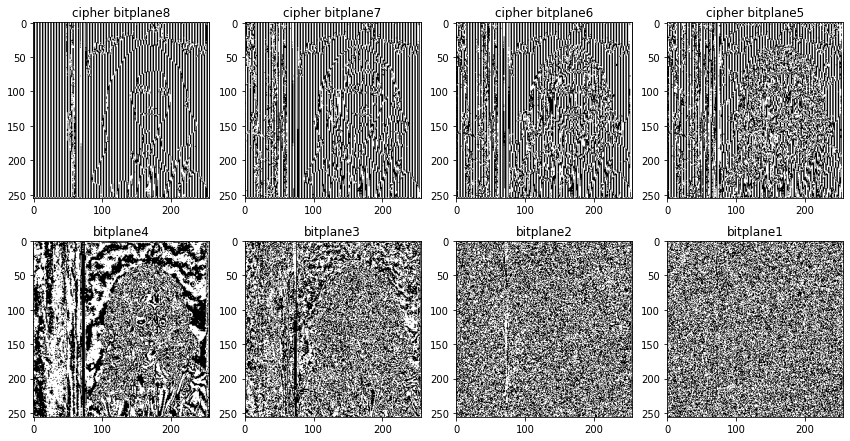

In [6]:
# displaying 8 bitplane images
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=.01, right=2, top=1.4)

## Image decryption

In [7]:
# retrieve bitplanes
retrieved_bitplane_images = []
for i in range(4):
    x, y, random_matrix = get_random_matrix(u, x, y, height, width)
    retrieved_bitplane_image = xor_matrix(random_matrix, bitplane_images[i])
    retrieved_bitplane_images.append(retrieved_bitplane_image)

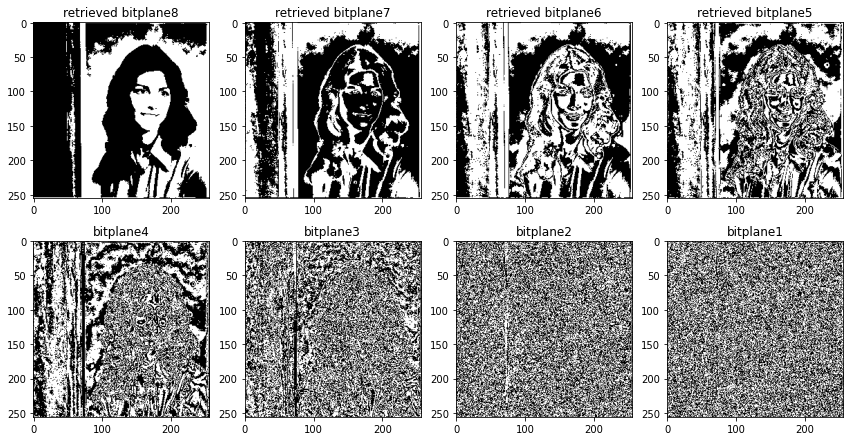

In [8]:
# cipher image composition
for i in range(len(retrieved_bitplane_images)):
    bitplane_images[i] = retrieved_bitplane_images[i]

titles = ['retrieved bitplane8',
          'retrieved bitplane7',
          'retrieved bitplane6',
          'retrieved bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=.01, right=2, top=1.4)

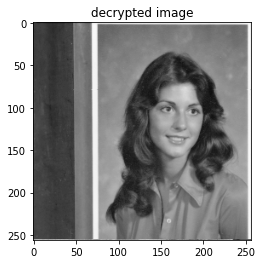

In [9]:
# Retrived image composition from 8 bitplane images
cipher_image = cipher_image_composition(bitplane_images, height, width)

# show the retrieved image
plt.title('decrypted image')
plt.imshow(cipher_image, cmap='gray', vmin=0, vmax=255)